In [1]:
import mxnet
import gluoncv as gcv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = 'street.jpeg'
img= mxnet.image.imread(image)
img.shape

(452, 678, 3)

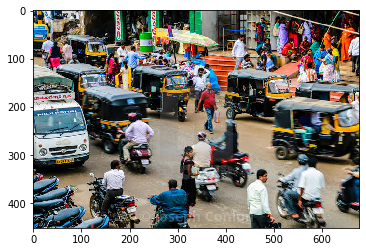

In [3]:
pltimg= np.array(img.asnumpy(), dtype= float)
pltimg= pltimg/255
plt.imshow(pltimg)

In [10]:
batch_image, chwimage= gcv.data.transforms.presets.yolo.transform_test(img)
foryoloimg.shape

(1, 3, 416, 624)

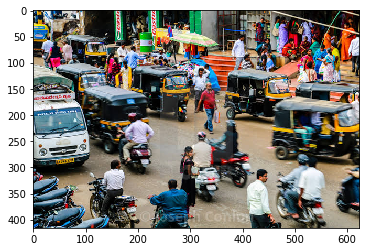

In [7]:
plt.imshow(chwimage)

In [8]:
network= gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained= True)


100%|██████████| 224190/224190 [01:32<00:00, 2416.12KB/s]


In [13]:
prediction= network(batch_image)
objects, probabilities, coordinates= prediction

In [34]:
top= 5
# print(objects[0][:5])
preds= (objects[0][:5]).asnumpy()
probs= (probabilities[0][:5]).asnumpy()
coords= (coordinates[0][:5]).asnumpy()
[print(network.classes[int(i)], ':', j[0], ':', k) for i, j, k in zip(preds, probs, coords)]


person : 0.99080276 : [127.54612 285.01987 175.87457 399.49698]
person : 0.9807858 : [408.3745  302.61548 467.3947  414.54926]
person : 0.9391032 : [168.09262 195.83801 230.70724 290.00775]
person : 0.9262585 : [218.82515 322.09378 301.47806 413.00955]
motorcycle : 0.86036164 : [ 95.76907 326.7032  208.1365  411.54358]


[None, None, None, None, None]

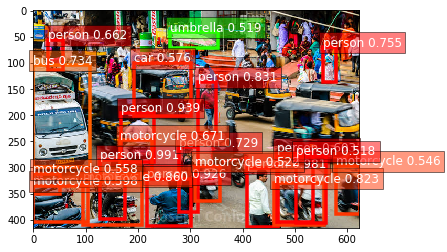

In [46]:

gcv.utils.viz.plot_bbox(
    chwimage, 
    coordinates[0], 
    probabilities[0], 
    objects[0], 
    class_names=network.classes
    )
plt.show()